In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 

In [2]:
df=pd.read_csv("hacktrain.csv")

In [3]:
df

,Unnamed: 0,ID,class,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,0,1,water,637.5950,658.668,-1882.030,-1924.36,997.904,-1739.990,630.087,...,NaN,-1043.160,-1942.490,267.138,NaN,NaN,211.328,-2203.020,-1180.19,433.906
1,1,2,water,634.2400,593.705,-1625.790,-1672.32,914.198,-692.386,707.626,...,NaN,-933.934,-625.385,120.059,364.858,476.972,220.878,-2250.000,-1360.56,524.075
2,3,4,water,58.0174,-1599.160,NaN,-1052.63,NaN,-1564.630,NaN,...,-1025.880,368.622,NaN,-1227.800,304.621,NaN,369.214,-2202.120,NaN,-1343.550
3,4,5,water,72.5180,NaN,380.436,-1256.93,515.805,-1413.180,-802.942,...,-1813.950,155.624,NaN,-924.073,432.150,282.833,298.320,-2197.360,NaN,-826.727
4,7,8,water,1136.4400,NaN,NaN,1647.83,1935.800,NaN,2158.980,...,1535.000,1959.430,-279.317,-384.915,-113.406,1020.720,1660.650,-116.801,-568.05,-1357.140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,10537,10538,impervious,1207.7000,984.620,NaN,1166.25,937.478,1072.700,823.896,...,1117.740,1176.600,1044.110,NaN,369.082,465.843,362.882,979.795,NaN,433.659
7996,10538,10539,impervious,2170.3500,1419.720,1361.000,1478.71,983.911,1262.110,1422.860,...,984.634,2128.970,1379.660,NaN,762.633,485.204,446.724,771.747,1589.06,506.936
7997,10541,10542,impervious,1895.6800,1454.740,NaN,1033.56,1930.380,1057.150,1471.600,...,888.408,2093.020,1232.110,1190.830,1441.460,1170.880,1095.000,1818.650,2501.72,1247.770
7998,10542,10543,impervious,3465.7400,1283.320,413.412,4391.05,1146.820,4473.050,1614.750,...,5833.760,4047.320,4515.800,433.177,277.296,744.143,NaN,3759.710,NaN,388.346


In [4]:
print(df.columns)

Index(['Unnamed: 0', 'ID', 'class', '20150720_N', '20150602_N', '20150517_N',
       '20150501_N', '20150415_N', '20150330_N', '20150314_N', '20150226_N',
       '20150210_N', '20150125_N', '20150109_N', '20141117_N', '20141101_N',
       '20141016_N', '20140930_N', '20140813_N', '20140626_N', '20140610_N',
       '20140525_N', '20140509_N', '20140423_N', '20140407_N', '20140322_N',
       '20140218_N', '20140202_N', '20140117_N', '20140101_N'],
      dtype='object')


In [5]:
print(df['class'].value_counts())

class
forest        6159
farm           841
impervious     669
grass          196
water          105
orchard         30
Name: count, dtype: int64


In [6]:
df.isnull().sum().sort_values(ascending=False)

20140423_N    1760
20140626_N    1600
20140218_N    1440
20141016_N    1440
20150226_N    1360
20141117_N    1280
20140117_N    1200
20150602_N    1200
20140322_N    1120
20150330_N    1120
20150125_N    1040
20150501_N     960
20140509_N     880
20150109_N     880
20140930_N     800
20150517_N     800
20150314_N     720
20140525_N     720
20150210_N     640
20140407_N     640
20140202_N     560
20140813_N     560
20150720_N     560
20150415_N     480
20140610_N     480
20141101_N     400
20140101_N     400
ID               0
class            0
Unnamed: 0       0
dtype: int64

In [7]:
df =df.drop(columns=['Unnamed: 0'])

In [8]:
ndvi_cols =[col for col in df.columns[2:]]

In [9]:
X_ndvi =df[ndvi_cols]
y =df['class']

<Axes: xlabel='ID', ylabel='20140423_N'>

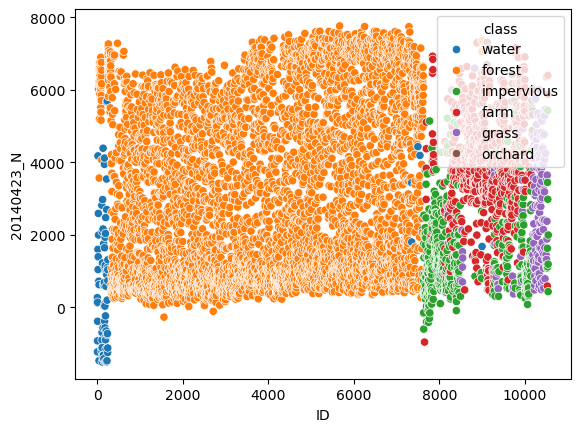

In [10]:
sns.scatterplot(x=df.ID, y=df["20140423_N"],hue=df['class'])

In [11]:
X_ndvi_imputed = pd.DataFrame(index=X_ndvi.index,columns=ndvi_cols)
for cls in y.unique():
    cls_idx=y ==cls
    cls_data= X_ndvi.loc[cls_idx]
    imputed =cls_data.interpolate(axis=1,limit_direction='both')
    X_ndvi_imputed.loc[cls_idx]=imputed

In [12]:
print(X_ndvi_imputed.isnull().sum().sum())

0


In [13]:
from scipy.ndimage import gaussian_filter1d
X_ndvi_denoised= X_ndvi_imputed.apply(lambda row: gaussian_filter1d(row.values.astype(float),sigma=1),axis=1, result_type='expand')
X_ndvi_denoised.columns=ndvi_cols

In [14]:
features = pd.DataFrame(index=X_ndvi_denoised.index)
features['mean'] =X_ndvi_denoised.mean(axis=1)
features['std'] =X_ndvi_denoised.std(axis=1)
features['max']= X_ndvi_denoised.max(axis=1)
features['min'] =X_ndvi_denoised.min(axis=1)
features['range']= features['max']-features['min']

diffs = X_ndvi_denoised.diff(axis=1).fillna(0)
features['max_diff'] =diffs.max(axis=1)
features['min_diff'] =diffs.min(axis=1)
features['mean_diff']= diffs.mean(axis=1)
features['skew']= X_ndvi_denoised.skew(axis=1)
features['kurtosis']= X_ndvi_denoised.kurtosis(axis=1)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
y_encoded =le.fit_transform(y)

model =LogisticRegression(multi_class='multinomial',solver='lbfgs',max_iter=1000)
model.fit(features, y_encoded)

C:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [16]:
test_df=pd.read_csv("hacktest.csv")

In [17]:
test_df.head()

,Unnamed: 0,ID,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,0,1,7466.42,413.162,5761.00,5625.45,489.403,3923.84,3097.110,6766.42,...,801.184,927.115,4704.14,6378.42,340.949,2695.570,527.268,4736.75,601.843,6639.760
1,1,2,7235.26,6037.350,1027.56,6085.14,1618.050,6668.54,2513.990,1051.69,...,5533.470,5103.040,5216.12,4885.27,4366.790,1234.140,3298.110,6942.68,1070.440,842.101
2,2,3,7425.08,6969.980,1177.94,7408.93,861.061,7644.43,814.458,1504.29,...,1981.390,6204.540,7021.69,5704.41,4897.450,1789.990,2206.100,6928.93,1036.560,831.441
3,3,4,7119.12,1731.620,6311.93,6441.61,465.979,7128.42,1649.120,6935.22,...,959.344,5794.150,1045.57,5572.90,586.287,685.906,1287.000,6734.72,824.584,6883.610
4,4,5,7519.55,8130.260,1482.54,7879.53,1001.210,7937.60,4122.530,1094.51,...,7636.070,6996.760,7413.43,4596.13,4511.700,1413.520,3283.940,7937.68,1857.800,1336.920


In [18]:
test_df =test_df.drop(columns=['Unnamed: 0'])
test_ndvi =test_df[[col for col in test_df.columns[1:]]]

In [19]:
test_ndvi_imputed=test_ndvi.interpolate(axis=1,limit_direction='both')

In [20]:
test_ndvi_denoised =test_ndvi_imputed.apply(lambda row: gaussian_filter1d(row.values.astype(float),sigma=1),axis=1,result_type='expand')
test_ndvi_denoised.columns =test_ndvi.columns

In [21]:
test_features =pd.DataFrame(index=test_ndvi_denoised.index)

test_features['mean'] =test_ndvi_denoised.mean(axis=1)
test_features['std'] =test_ndvi_denoised.std(axis=1)
test_features['max']= test_ndvi_denoised.max(axis=1)
test_features['min']= test_ndvi_denoised.min(axis=1)
test_features['range'] =test_features['max'] - test_features['min']

diffs_test = test_ndvi_denoised.diff(axis=1).fillna(0)
test_features['max_diff']= diffs_test.max(axis=1)
test_features['min_diff']= diffs_test.min(axis=1)
test_features['mean_diff']= diffs_test.mean(axis=1)
test_features['skew'] =test_ndvi_denoised.skew(axis=1)
test_features['kurtosis'] =test_ndvi_denoised.kurtosis(axis=1)

In [22]:
y_pred_encoded =model.predict(test_features)
y_pred_labels =le.inverse_transform(y_pred_encoded)

In [25]:
submission =pd.DataFrame({'ID': test_df['ID'],'predicted_class': y_pred_labels})
submission.head()

,ID,predicted_class
0,1,forest
1,2,forest
2,3,forest
3,4,forest
4,5,forest


In [26]:
submission.to_csv('hackathon 1 LR.csv', index=False)